## 신경망과 딥러닝
# Cifar-10 분류
- 10가지 클래스
- 컬러이미지

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train.ravel()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
X_train.dtype, X_train.max(), X_train.min()

(dtype('uint8'), 255, 0)

### 데이터 전처리

In [7]:
### 0~255 값을 0.0~1.0 으로 바꾼다
X_train = X_train/255
X_test = X_test/255

### 원핫인코딩
y_train = np.eye(10)[y_train.ravel()] # ravel() : 1차원형태로 바꾼다
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [9]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

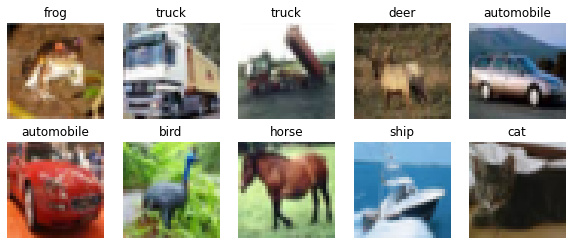

In [10]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i].argmax()])

### CNN 적용

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
            activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [13]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 9s 10ms/step - loss: 1.5607 - acc: 0.4516 - val_loss: 1.3643 - val_acc: 0.5290
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.2703 - acc: 0.5562 - val_loss: 1.2490 - val_acc: 0.5676
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.1789 - acc: 0.5915 - val_loss: 1.2228 - val_acc: 0.5839
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 1.1053 - acc: 0.6136 - val_loss: 1.1539 - val_acc: 0.5997
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 1.0472 - acc: 0.6377 - val_loss: 1.1330 - val_acc: 0.6090
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9979 - acc: 0.6540 - val_loss: 1.1249 - val_acc: 0.6090
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9621 - acc: 0.6690 - val_loss: 1.0699 - val_acc: 0.6318
Epoch 8/20
625/625 [==============================] - 6s 9ms/step - loss: 0

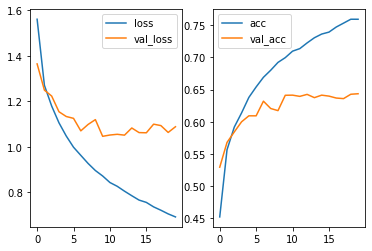

In [14]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 중간층 추가

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                              input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 1.5014 - acc: 0.4585 - val_loss: 1.2761 - val_acc: 0.5483
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 1.0685 - acc: 0.6222 - val_loss: 0.9842 - val_acc: 0.6559
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 0.8853 - acc: 0.6896 - val_loss: 0.8811 - val_acc: 0.6953
Epoch 4/20
625/625 [==============================] - 9s 15ms/step - loss: 0.7732 - acc: 0.7286 - val_loss: 0.8538 - val_acc: 0.7076
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 0.6757 - acc: 0.7668 - val_loss: 0.8037 - val_acc: 0.7264
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 0.5979 - acc: 0.7923 - val_loss: 0.8106 - val_acc: 0.7286
Epoch 7/20
625/625 [==============================] - 10s 15ms/step - loss: 0.5252 - acc: 0.8161 - val_loss: 0.7986 - val_acc: 0.7445
Epoch 8/20
625/625 [==============================] - 10s 15ms/ste

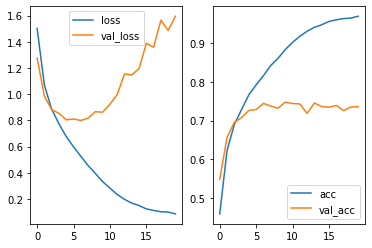

In [18]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### 모델 저장

In [27]:
model.save('cifar10_model_1.h5')  # creates a HDF5 file

In [28]:
from keras.models import load_model

model2 = load_model('cifar10_model_1.h5')

In [ ]:
model.save_weights("cifar10_weights_01.h5")
model2.load_weights("cifar10_weights_01.h5")

### 결과 분석

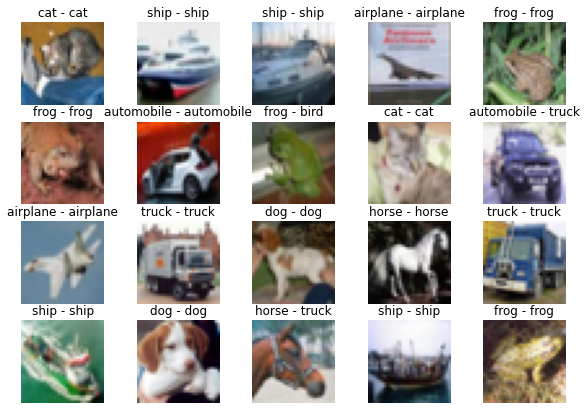

In [19]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + ' - ' + labels[np.argmax(y_pred[i])])

In [20]:
y_pred = model.predict(X_test)
(y_test.argmax(axis=1) == y_pred.argmax(axis=1)).mean()

0.7293

In [21]:
idx = np.where(y_test.argmax(axis=1) != y_pred.argmax(axis=1))[0]

In [22]:
np.bincount(y_test[idx].argmax(axis=1))

array([226, 138, 421, 377, 320, 446, 216, 208, 167, 188], dtype=int64)

In [23]:
np.bincount(y_pred[idx].argmax(axis=1))

array([240, 176, 307, 611, 322, 246, 203, 229, 158, 215], dtype=int64)

- Confusion matrix

In [24]:
mat = np.zeros([10,10])

for i in idx:
    mat[y_test[i].argmax(), y_pred[i].argmax()] += 1

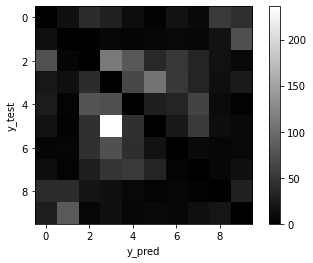

In [26]:
plt.imshow(mat, cmap='gray')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.colorbar()

### BatchNormalization 적용
- 중간층에서 변환된 이미지들을 정규화하는 방법을 학습한다
- 노드당 훈련가중지 2개씩, 비훈련가중치 2개씩 할당됨

In [28]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(3, input_shape=(4,)))
model2.add(keras.layers.BatchNormalization())
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
batch_normalization_1 (Batch (None, 3)                 12        
Total params: 27
Trainable params: 21
Non-trainable params: 6
_________________________________________________________________


In [37]:
help(keras.layers.BatchNormalization)

Help on class BatchNormalization in module tensorflow.python.keras.layers.normalization_v2:

class BatchNormalization(tensorflow.python.keras.layers.normalization.BatchNormalizationBase)
 |  BatchNormalization(*args, **kwargs)
 |  
 |  Layer that normalizes its inputs.
 |  
 |  Batch normalization applies a transformation that maintains the mean output
 |  close to 0 and the output standard deviation close to 1.
 |  
 |  Importantly, batch normalization works differently during training and
 |  during inference.
 |  
 |  **During training** (i.e. when using `fit()` or when calling the layer/model
 |  with the argument `training=True`), the layer normalizes its output using
 |  the mean and standard deviation of the current batch of inputs. That is to
 |  say, for each channel being normalized, the layer returns
 |  `gamma * (batch - mean(batch)) / sqrt(var(batch) + epsilon) + beta`, where:
 |  
 |  - `epsilon` is small constant (configurable as part of the constructor
 |  arguments)
 |

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                              input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [31]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 13s 20ms/step - loss: 1.3144 - acc: 0.5344 - val_loss: 1.2106 - val_acc: 0.5671
Epoch 2/20
625/625 [==============================] - 12s 19ms/step - loss: 0.9068 - acc: 0.6807 - val_loss: 0.9090 - val_acc: 0.6820
Epoch 3/20
625/625 [==============================] - 12s 19ms/step - loss: 0.7227 - acc: 0.7466 - val_loss: 1.4414 - val_acc: 0.5758
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 0.5913 - acc: 0.7915 - val_loss: 0.8777 - val_acc: 0.7023
Epoch 5/20
625/625 [==============================] - 12s 19ms/step - loss: 0.4834 - acc: 0.8317 - val_loss: 0.8547 - val_acc: 0.7247
Epoch 6/20
625/625 [==============================] - 12s 19ms/step - loss: 0.3841 - acc: 0.8636 - val_loss: 0.8760 - val_acc: 0.7216
Epoch 7/20
625/625 [==============================] - 12s 19ms/step - loss: 0.2979 - acc: 0.8943 - val_loss: 1.0006 - val_acc: 0.7008
Epoch 8/20
625/625 [==============================] - 12s 19ms

### Dropout 적용
- **훈련시**, 중간층의 노드들을 고의적으로 막는다
- 검증과 예측시에는 노드를 막지 않는다

In [32]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(3, input_shape=(4,)))
model2.add(keras.layers.Dropout(0.3)) # 30% 를 막는다
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 15        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                              input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [35]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 14s 21ms/step - loss: 1.9657 - acc: 0.2824 - val_loss: 2.4693 - val_acc: 0.3357
Epoch 2/20
625/625 [==============================] - 12s 20ms/step - loss: 1.6152 - acc: 0.4122 - val_loss: 1.3745 - val_acc: 0.4945
Epoch 3/20
625/625 [==============================] - 12s 20ms/step - loss: 1.4831 - acc: 0.4574 - val_loss: 1.3864 - val_acc: 0.5194
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 1.3803 - acc: 0.5018 - val_loss: 1.6320 - val_acc: 0.4783
Epoch 5/20
625/625 [==============================] - 12s 19ms/step - loss: 1.3011 - acc: 0.5338 - val_loss: 2.6162 - val_acc: 0.3374
Epoch 6/20
625/625 [==============================] - 12s 19ms/step - loss: 1.2310 - acc: 0.5636 - val_loss: 1.1712 - val_acc: 0.6006
Epoch 7/20
625/625 [==============================] - 12s 20ms/step - loss: 1.1849 - acc: 0.5801 - val_loss: 1.3336 - val_acc: 0.5602
Epoch 8/20
625/625 [==============================] - 12s 20ms

In [36]:
y_pred = model.predict(X_test)
(y_test.argmax(axis=1) == y_pred.argmax(axis=1)).mean()

0.7479